# 评分卡

用逻辑回归制作评分卡

```mermaid
graph TD
    A[获取数据] --> B(数据清洗<br>特征工程)
    B --> C(模型开发)
    C --> D(模型检验与评估)
    D --> E(模型上线)
    E --> F(监测与报告)
    F -- 反馈/迭代 --> A
```

In [43]:
import numpy as np
import pandas as pd
import scipy
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

data = pd.read_csv('cs-training.csv')

In [9]:
data.shape

(150000, 11)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

## 数据预处理

### 数据去重

In [44]:
data.drop_duplicates(inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtypes: fl

In [45]:
#恢复索引
data.index = range(data.shape[0])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

### 缺失值处理

In [ ]:
# data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [4]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [46]:
# 均值填补家属人数
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(), inplace=True)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\4121691313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(), inplace=True)


In [32]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [47]:
# 填补收入的缺失值
# 不填写收入的大概率是收入不稳定或者收入不高；也可能是系统问题
# 用0或者四分位数中的后四分之一来填补
# 用随机森林填补缺失值（实际中很少用算法来填补缺失值）
# 随机森林很适合：某一个特征大量确实，其他特征却很完整的情况
# 具体思路可以去随机森林笔记文件查看
def fill_missing_rf(x, y, to_fill):
    # x:要填补的特征
    # y：完整的、无缺失值的标签
    from sklearn.ensemble import RandomForestClassifier

    # 构建我们的新特征矩阵和新标签
    df = x.copy()
    df = df.astype(np.float32)
    fill = df.loc[:, to_fill]
    df = pd.concat([df.loc[:, df.columns != to_fill], pd.DataFrame(y)], axis = 1)

    # 找出训练集测试集
    ytrain = fill[fill.notnull()]
    ytrain = ytrain.astype(np.int8)
    ytest = fill[fill.isnull()]
    xtrain = df.iloc[ytrain.index, :]
    xtest = df.iloc[ytest.index, :]
    

    # 用RF填补缺失值
    # 电脑没有足够运行空间
    rfr = RandomForestClassifier(n_estimators=50).fit(xtrain, ytrain)
    ypredict = rfr.predict(xtest)

    return ypredict

x = data.iloc[:, 1:]
y = data.iloc[:, 0]
y

0         1
1         0
2         0
3         0
4         0
         ..
149386    0
149387    0
149388    0
149389    0
149390    0
Name: SeriousDlqin2yrs, Length: 149391, dtype: int64

In [34]:
x.shape

(149391, 10)

In [48]:
y_pred = fill_missing_rf(x, y, 'MonthlyIncome')

In [8]:
y_pred.shape

(29221,)

In [49]:
data.loc[data.loc[:, 'MonthlyIncome'].isnull(), 'MonthlyIncome' ] = y_pred

In [10]:
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### 描述性统计处理异常值

日常处理，我们依靠3 $\sigma$原则或者箱线图来找到异常值。但是在银行数据中，我们希望排除的异常值不是一些超高或者超低的数据，而是一些不符常理的数据。在银行业中，我们往往就使用普通的描述性统计来观察数据的异常与否与数据的分布情况。注意，这种只能在特征量有限的情况下进行，如果有几百个特征值又无法成功降维或者特征选择不管用，那还是用3sigma原则比较好。

In [50]:
# 描述性统计
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5369.380351,13174.600513,-128.0,0.0,0.000000,1600.000000,4400.000000,7400.000000,10782.000000,23084.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


从上面这些统计量可以看出来：

有些统计量严重偏态

年龄最小值为0？

NumberOfTime30-59DaysPastDueNotWorse/NumberOfTime60-89DaysPastDueNotWorse/NumberOfTimes90DaysLate 发现数据有异常

##### 删除异常值

In [51]:
# 发现有人age为0
(data['age'] == 0).sum()

1

In [52]:
# 发现只有一个人年龄为0，那么判定为异常值
data = data[data['age'] != 0]

In [53]:
data.shape

(149390, 11)

In [54]:
data[data['NumberOfTimes90DaysLate'] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [55]:
# 有225个样本逾期超过90天的次数超过90
data[data.loc[:, 'NumberOfTimes90DaysLate'] > 90]
# 运行发现这些人标签并非全部为1，说明不全是坏客户

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.000000
2285,0,1.0,22,98,0.0,-76.0,0,98,0,98,0.000000
3883,0,1.0,38,98,12.0,0.0,0,98,0,98,0.000000
4416,0,1.0,21,98,0.0,0.0,0,98,0,98,0.000000
4704,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,-94.0,0,98,0,98,0.759863
147180,1,1.0,68,98,255.0,0.0,0,98,0,98,0.000000
148548,1,1.0,24,98,54.0,1.0,0,98,0,98,0.000000
148634,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.000000


In [46]:
data.loc[:, 'NumberOfTimes90DaysLate'].value_counts()

# 发现大于90天的人是逾期96/98天
# 认为是异常情况


NumberOfTimes90DaysLate
0     141107
1       5232
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64

In [56]:

data = data[data['NumberOfTimes90DaysLate'] < 90]
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.0,0.003174,0.030033,0.153615,0.553698,0.97502,1.094061,50708.0
age,149165.0,52.331076,14.714114,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.00000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.0,0.036385,0.178211,0.368619,0.876994,1277.30000,4989.360000,329664.0
MonthlyIncome,149165.0,5374.937747,13183.432232,-128.0,0.0,0.000000,1600.000000,4400.000000,7411.000000,10792.60000,23095.520000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,1.0,3.000000,5.000000,8.000000,11.000000,15.00000,24.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.00000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,11.0


In [57]:
# 恢复索引
data.index = range(data.shape[0])

不进行量纲统一，因为没有现实意义，应该尽量保持数据的原貌。

### 样本不均衡问题

In [58]:
# 探索标签的分布
x = data.iloc[:, 1:]
y = data.iloc[:, 0]


In [38]:
y.value_counts()

SeriousDlqin2yrs
0    139851
1      9879
Name: count, dtype: int64

In [59]:
n_samples = x.shape[0]
n_samples

149165

In [60]:
num0 = y.value_counts()[0]
num1 = y.value_counts()[1]
print('样本个数：{}；1占{:.2%}；0占{:.2%}'.format(n_samples,num1/n_samples, num0/n_samples))

样本个数：149165；1占6.62%；0占93.38%


In [61]:
# 逻辑回归中使用上采样方法来平衡样本
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state=420)
x, y = sm.fit_resample(x, y) # 样本平衡后的特征矩阵和标签

In [63]:
n_samples = x.shape[0]
num0 = y.value_counts()[0]
num1 = y.value_counts()[1]
print('样本个数：{}；1占{:.2%}；0占{:.2%}'.format(n_samples,num1/n_samples, num0/n_samples))

样本个数：278584；1占50.00%；0占50.00%


### 保存训练集和测试集

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

xtrain, xvali, ytrain, yvali = train_test_split(x, y, test_size=0.3, random_state=420)

In [66]:
model_data = pd.concat([ytrain, xtrain], axis = 1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

vali_data = pd.concat([yvali, xvali], axis = 1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

model_data.to_csv('model_data.csv')
vali_data.to_csv('vali_data.csv')

## 分箱

本质是将连续型变量离散化，是将拥有不同属性的被分到不同的类。

**分多少个箱子合适**？

最好控制在10个以下。用来制作评分卡，最好在4-5个为佳。离散化连续型变量必然导致信息损失，且箱子越少，损失越大。为了衡量特增上的信息量以及特征对预测函数的贡献，银行业定义了概念**Information Vaule(IV)**:
$$
IV = \sum_{i=1}^{N} (\text{good\%} - \text{bad\%}) \times WOE_i
$$

$N$：特征分箱的数量

$\text{good\%}$：在第 $i$ 个分箱中好客户的比例（该分箱好客户数 / 所有好客户总数）。

$\text{bad\%}$：在第 $i$ 个分箱中坏客户的比例（该分箱坏客户数 / 所有坏客户总数）。

$WOE_i$：第 $i$ 个分箱的证据权重 (Weight of Evidence)，其计算公式为 $WOE_i = \ln\left(\frac{\text{good\%}}{\text{bad\%}}\right)$。WOE越大，代表这个箱子里的优质客户越多。

$IV$是对整个特征来说的：
| IV        | 特征对预测函数的贡献                                  |
| :-------- | :---------------------------------------------------- |
| < 0.03    | 特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除 |
| 0.03 ~ 0.09 | 有效信息很少，对模型的贡献度低                       |
| 0.1 ~ 0.29 | 有效信息一般，对模型的贡献度中等                     |
| 0.3 ~ 0.49 | 有效信息较多，对模型的贡献度较高                     |
| >=0.5     | 有效信息非常多，对模型的贡献超高并且可疑             |

可见IV并非越大越好，我们需要找到IV大小与箱子个数的平衡点。因此，我们会对特征进行分箱，然后计算每个特征在每个箱子数目下的WOE值，利用IV值的曲线，找出合适的分箱个数。

**分箱要达成什么效果**？

我们希望同一个箱子里的人的属性尽量相似，而不同箱子的人的属性尽量不同，即“组内差异小，组间差异大”。   

对于评分卡来说，我们希望一个箱子里的人的违约概率是类似的，而不同箱子的人的违约概率差距很大，即WOE的差异要大，并且每个箱子重坏客户所占的比重(bad%)也是不同的。那我们，可以使用卡方检验来对比两个箱子之间的相似性，如果两个箱子之间的卡方检验的p值很大，说明他们很相似，可以合并为同一个箱子 。

**分箱的步骤**

1、首先吧把续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组、50组

2、确保每一组重都要包含两种类别的样本，否则IV值无法进行计算

3、我们对相邻的组进行卡方检验，合并P值大的，知道数据中的组数小于设定的N箱

4、我们让一个特征分别分成【2， 3， 4... 20】箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数

5、分箱完毕后，计算每个箱子的WOE、bad%，观察分箱效果

这些步骤完成后，我们可以对每个特征进行分箱，然后观察每个特征的IV值，以此来挑选特征


##### 等频分箱

In [67]:
# **等频分箱**
# pd.qcut 基于分位数的等频分箱
model_data["qcut"], updown = pd.qcut(model_data['age'], retbins=True, q = 20)

In [29]:
model_data.shape

(195008, 12)

In [30]:
updown
# 返回的是箱子的上限和下限

array([  0.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 109.])

In [31]:
# 统计每个分箱中的0,1的数量
model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\3043972139.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
qcut,,,,,,,,,,,
"(-0.001, 28.0]",4270,4270,4270,4270,4270,4270,4270,4270,4270,4270,4270
"(28.0, 31.0]",3556,3556,3556,3556,3556,3556,3556,3556,3556,3556,3556
"(31.0, 34.0]",4025,4025,4025,4025,4025,4025,4025,4025,4025,4025,4025
"(34.0, 36.0]",2891,2891,2891,2891,2891,2891,2891,2891,2891,2891,2891
"(36.0, 39.0]",5109,5109,5109,5109,5109,5109,5109,5109,5109,5109,5109
"(39.0, 41.0]",3967,3967,3967,3967,3967,3967,3967,3967,3967,3967,3967
"(41.0, 43.0]",4042,4042,4042,4042,4042,4042,4042,4042,4042,4042,4042
"(43.0, 45.0]",4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452
"(45.0, 47.0]",4802,4802,4802,4802,4802,4802,4802,4802,4802,4802,4802


In [68]:
count0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs']

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1236309115.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1236309115.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs']


In [69]:
[*zip(updown, updown[1:])]
# 箱的上界和下界

[(21.0, 28.0),
 (28.0, 31.0),
 (31.0, 34.0),
 (34.0, 36.0),
 (36.0, 39.0),
 (39.0, 41.0),
 (41.0, 43.0),
 (43.0, 45.0),
 (45.0, 47.0),
 (47.0, 48.0),
 (48.0, 50.0),
 (50.0, 52.0),
 (52.0, 54.0),
 (54.0, 56.0),
 (56.0, 58.0),
 (58.0, 61.0),
 (61.0, 64.0),
 (64.0, 68.0),
 (68.0, 74.0),
 (74.0, 107.0)]

In [70]:
[*zip(updown, updown[1:], count0, count1)]

[(21.0, 28.0, 4243, 7577),
 (28.0, 31.0, 3571, 5934),
 (31.0, 34.0, 4075, 6762),
 (34.0, 36.0, 2908, 4661),
 (36.0, 39.0, 5182, 7403),
 (39.0, 41.0, 3956, 5795),
 (41.0, 43.0, 4002, 5596),
 (43.0, 45.0, 4389, 5956),
 (45.0, 47.0, 4800, 6414),
 (47.0, 48.0, 2432, 3180),
 (48.0, 50.0, 4900, 6088),
 (50.0, 52.0, 4728, 5829),
 (52.0, 54.0, 4681, 4899),
 (54.0, 56.0, 4677, 4136),
 (56.0, 58.0, 4483, 3402),
 (58.0, 61.0, 6583, 4786),
 (61.0, 64.0, 6968, 3208),
 (64.0, 68.0, 6623, 2354),
 (68.0, 74.0, 6753, 1974),
 (74.0, 107.0, 7737, 1363)]

In [71]:
# 创建一张表展示每个箱子中1/0的个数
# num_bins 分别为每个区间的上界、下界，0出现的次数、1出现的次数
num_bins = [*zip(updown, updown[1:], count0, count1)]
num_bins

[(21.0, 28.0, 4243, 7577),
 (28.0, 31.0, 3571, 5934),
 (31.0, 34.0, 4075, 6762),
 (34.0, 36.0, 2908, 4661),
 (36.0, 39.0, 5182, 7403),
 (39.0, 41.0, 3956, 5795),
 (41.0, 43.0, 4002, 5596),
 (43.0, 45.0, 4389, 5956),
 (45.0, 47.0, 4800, 6414),
 (47.0, 48.0, 2432, 3180),
 (48.0, 50.0, 4900, 6088),
 (50.0, 52.0, 4728, 5829),
 (52.0, 54.0, 4681, 4899),
 (54.0, 56.0, 4677, 4136),
 (56.0, 58.0, 4483, 3402),
 (58.0, 61.0, 6583, 4786),
 (61.0, 64.0, 6968, 3208),
 (64.0, 68.0, 6623, 2354),
 (68.0, 74.0, 6753, 1974),
 (74.0, 107.0, 7737, 1363)]

##### *检验每个箱子中是否都包含两类样本

In [ ]:
# 确保每个箱中都有0和1
for i in range(20):
    # 如果第一个组没有包含正样本或者负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2] + num_bins[1][2],
            num_bins[0][3] + num_bins[1][3]
        )]
        continue
'''
合并之后，第一行的组是否一定有两种样本了呢？不一定
如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也是没有包含两种样本
所以我们每次合并完毕之后，还需要检查，第一组是否已经包含了两种样本
这里使用conyinue跳出本次循环，开始下一次循环，所以回到了最开始的for in
range i自增
这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
如果第一组仍然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
如果第一组中已经包含两种样本，则if不通过，就开始执行下面这段代码
'''

# 已经确认第一组（包括合并的情况）中包含两种样本了 开始执行下面的代码
# 此时的num_bins已经被上面代码处理过，可能被合并过，也可能没有
# 无论如何，我们遍历numbins
for i in range(len(num_bins)):
    if 0 in num_bins[i][2:]:
        num_bins[i-1][i+1] = [(
            num_bins[i-1][0],
            num_bins[i][1],
            num_bins[i-1][2]+num_bins[i][2],
            num_bins[i-1][3]+num_bins[i][3])]
        break
    # 如果对第一组和后面所有读的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break

'''
倒数第二个break只有if满足的条件下才会被触发
也就是说，只有发生了合并，才会打断 for i in len 这个循环
为什么要打断这个循环？
因为我们是要在range(len)中遍历，但合并发生之后，len发生了变化，但是循环却不会重新开始
循环会回到最开始的foriinrange（20）中回去
此时判断第一组是否有两种标签的代码不会被处罚，但是for i in range(len)却会被重新运行
这样就更新了i的取值
'''
    

##### WOE和IV计算

注意bad rate是一个箱中坏的样本所占的比例(bad/total)

bad%是一个箱中的坏样本占整个特征中坏样本的比例

In [72]:
def get_woe(num_bins):
    columns = ['min', 'max', 'count0', 'count1']
    df = pd.DataFrame(num_bins, columns=columns)

    df['total'] = df.count0 + df.count1
    df['%'] = df.total/df.total.sum()
    df['bad_rate'] = df.count1/df.total
    df['good%'] = df.count0/df.count0.sum()
    df["bad%"]  = df.count1/df.count1.sum()
    df['woe'] = np.log(df['good%']/df['bad%'])
    return df

df = get_woe(num_bins)
df

,min,max,count0,count1,total,%,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7577,11820,0.060613,0.641032,0.043433,0.077859,-0.583683
1,28.0,31.0,3571,5934,9505,0.048742,0.624303,0.036554,0.060976,-0.511689
2,31.0,34.0,4075,6762,10837,0.055572,0.623973,0.041713,0.069484,-0.510284
3,34.0,36.0,2908,4661,7569,0.038814,0.615801,0.029767,0.047895,-0.475600
4,36.0,39.0,5182,7403,12585,0.064536,0.588240,0.053045,0.076071,-0.360530
5,39.0,41.0,3956,5795,9751,0.050003,0.594298,0.040495,0.059548,-0.385598
6,41.0,43.0,4002,5596,9598,0.049218,0.583038,0.040966,0.057503,-0.339094
7,43.0,45.0,4389,5956,10345,0.053049,0.575737,0.044927,0.061202,-0.309133
8,45.0,47.0,4800,6414,11214,0.057505,0.571964,0.049135,0.065908,-0.293703
9,47.0,48.0,2432,3180,5612,0.028778,0.566643,0.024895,0.032677,-0.272003


In [73]:
def get_iv(bins_df):
    rate = bins_df['good%'] - bins_df['bad%']
    iv  = np.sum(rate * bins_df.woe)
    return iv

ivage = get_iv(df)
ivage
# 属于有效信息较多 价值较高的列

0.35075370726153776

##### 卡方检验，合并箱体，画出IV曲线

In [74]:
num_bins_ = num_bins.copy()
num_bins_[1][2:]
num_bins_

[(21.0, 28.0, 4243, 7577),
 (28.0, 31.0, 3571, 5934),
 (31.0, 34.0, 4075, 6762),
 (34.0, 36.0, 2908, 4661),
 (36.0, 39.0, 5182, 7403),
 (39.0, 41.0, 3956, 5795),
 (41.0, 43.0, 4002, 5596),
 (43.0, 45.0, 4389, 5956),
 (45.0, 47.0, 4800, 6414),
 (47.0, 48.0, 2432, 3180),
 (48.0, 50.0, 4900, 6088),
 (50.0, 52.0, 4728, 5829),
 (52.0, 54.0, 4681, 4899),
 (54.0, 56.0, 4677, 4136),
 (56.0, 58.0, 4483, 3402),
 (58.0, 61.0, 6583, 4786),
 (61.0, 64.0, 6968, 3208),
 (64.0, 68.0, 6623, 2354),
 (68.0, 74.0, 6753, 1974),
 (74.0, 107.0, 7737, 1363)]

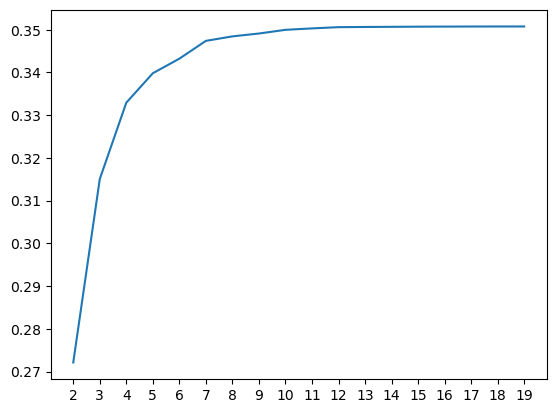

In [75]:

iv = []
axisx = []
N = 2 # 箱数

while len(num_bins_) > N:
    pvalues = []
    # print(f"\n # Current num_bins_ length: {len(num_bins_)}")
    for i in range(len(num_bins_) - 1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        pvalue = scipy.stats.chi2_contingency([x1, x2])[1]
        pvalues.append(pvalue)
    
    i = pvalues.index(max(pvalues))
    num_bins_[i:i+2] = [(
        num_bins_[i][0],
        num_bins_[i+1][1],
        num_bins_[i][2] + num_bins_[i+1][2],
        num_bins_[i][3] + num_bins_[i+1][3]
    )]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    iv.append(get_iv(bins_df))
    

plt.figure()
plt.plot(axisx, iv)
plt.xticks(axisx)
plt.show()

# 选择骤降的那个转折点
# 对于age的最佳分箱个数为7

##### 用最佳分箱的结果分箱，包装分箱函数

In [76]:
def get_bins(num_bins_, N):
    while len(num_bins_) > N:
        pvalues = []
        # print(f"\n # Current num_bins_ length: {len(num_bins_)}")
        for i in range(len(num_bins_) - 1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pvalue = scipy.stats.chi2_contingency([x1, x2])[1]
            pvalues.append(pvalue)
        
        i = pvalues.index(max(pvalues))
        num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2] + num_bins_[i+1][2],
            num_bins_[i][3] + num_bins_[i+1][3]
        )]
    return  num_bins_

In [77]:
afterbins = get_bins(num_bins, 7)
afterbins

[(21.0, 36.0, 14797, 24934),
 (36.0, 52.0, 34389, 46261),
 (52.0, 56.0, 9358, 9035),
 (56.0, 61.0, 11066, 8188),
 (61.0, 64.0, 6968, 3208),
 (64.0, 74.0, 13376, 4328),
 (74.0, 107.0, 7737, 1363)]

In [78]:
bins_df = get_woe(afterbins)
bins_df
# woe应该单调或者只有一个转折点

,min,max,count0,count1,total,%,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24934,39731,0.203740,0.627570,0.151467,0.256214,-0.525644
1,36.0,52.0,34389,46261,80650,0.413573,0.573602,0.352018,0.475364,-0.300398
2,52.0,56.0,9358,9035,18393,0.094319,0.491219,0.095792,0.092841,0.031290
3,56.0,61.0,11066,8188,19254,0.098734,0.425262,0.113276,0.084137,0.297372
4,61.0,64.0,6968,3208,10176,0.052182,0.315252,0.071327,0.032964,0.771845
5,64.0,74.0,13376,4328,17704,0.090786,0.244465,0.136922,0.044473,1.124521
6,74.0,107.0,7737,1363,9100,0.046665,0.149780,0.079199,0.014006,1.732490


##### 将分箱过程包装为一个函数


In [79]:
def graphforbestbin(DF, X, Y, n = 5, q = 20, graph = True):
    '''
    自动最优分箱函数，基于卡方检验

    参数
        DF：需要输入的数据
        X： 需要分箱的列名
        Y： 分箱数据对应的标签Y列名
        n： 箱数
        q： 初始分箱个数
        graph：是否画出IV曲线
    '''
    DF = DF[[X, Y]].copy()
    DF["qcut"], bins = pd.qcut(DF[X], retbins=True, q = q, duplicates='drop')
    count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
    count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]
    num_bins = [*zip(bins,bins[1:], count0, count1)]

    for i in range(20):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2] + num_bins[1][2],
                num_bins[0][3] + num_bins[1][3]
            )]
            continue
        
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1][i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3])]
            break
        
        else:
            break


    def get_woe(num_bins):
        columns = ['min', 'max', 'count0', 'count1']
        df = pd.DataFrame(num_bins, columns=columns)

        df['total'] = df.count0 + df.count1
        df['%'] = df.total/df.total.sum()
        df['bad_rate'] = df.count1/df.total
        df['good%'] = df.count0/(df.count0.sum()  + 1e-6)
        df["bad%"]  = df.count1/(df.count1.sum() + 1e-6)
        df['woe'] = np.log(df['good%']/df['bad%'])
        return df
    
    def get_iv(bins_df):
        rate = bins_df['good%'] - bins_df['bad%']
        iv  = np.sum(rate * bins_df.woe)
        return iv
    
    iv = []
    axisx = []
    
    # 核心修正：在while循环开始前，计算并赋值一次 bins_df
    # 这样，即使while循环不执行（因为 len(num_bins) <= n），bins_df 也会有值
    if num_bins: # 确保 num_bins 非空才能计算
        bins_df = get_woe(num_bins) # 初始计算，这个是当前状态的bins_df
        iv.append(get_iv(bins_df)) # 记录初始IV
        axisx.append(len(num_bins)) # 记录初始箱数
    else:
        # 如果经过前面的处理，num_bins 依然是空的，那么直接返回空的 DataFrame
        print(f"Warning for {X}: No valid bins to process after initial steps. Returning empty DataFrame.")
        return pd.DataFrame(columns=['min', 'max', 'count0', 'count1', 'total', '%', 'bad_rate', 'good%', 'bad%', 'woe'])

   

    while len(num_bins) > n:
        pvalues = []
        # print(f"\n # Current num_bins_ length: {len(num_bins_)}")
        for i in range(len(num_bins) - 1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            # --- 仅修改此处以解决 ValueError ---
            try:
                pvalue = scipy.stats.chi2_contingency([x1, x2])[1]
            except ValueError:
                # 当 ValueError 发生时，直接设置一个大 P 值，表示倾向于合并
                # 这通常是因为期望频数计算为零，说明这两个箱子差异不显著或数据极度稀疏
                pvalue = 1.0 # 设置为1.0表示无显著差异，倾向于合并
            # --- 仅修改此处以解决 ValueError ---
            pvalues.append(pvalue)
        
        i = pvalues.index(max(pvalues))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2] + num_bins[i+1][2],
            num_bins[i][3] + num_bins[i+1][3]
        )]
        bins_df = get_woe(num_bins)
        axisx.append(len(num_bins))
        iv.append(get_iv(bins_df))

    
    if graph:
        plt.figure()
        plt.plot(axisx, iv)
        plt.xticks(axisx)
        plt.xlabel('number of box')
        plt.ylabel('iv-value')
        plt.show()
    return bins_df

 

In [80]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


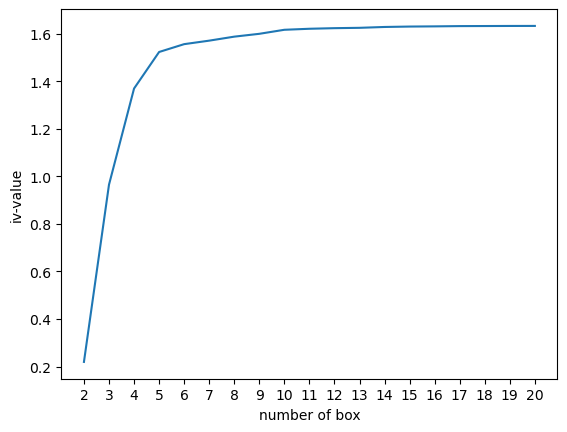

age


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


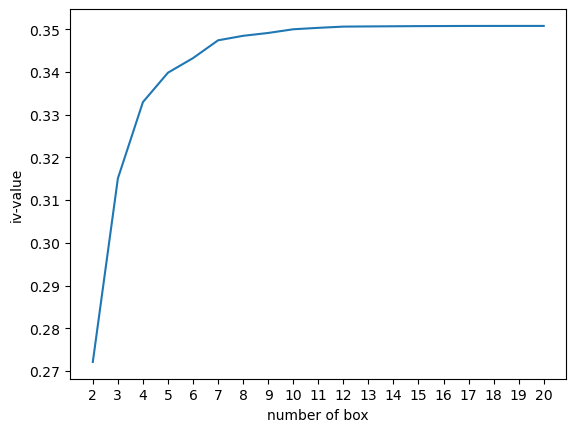

NumberOfTime30-59DaysPastDueNotWorse


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


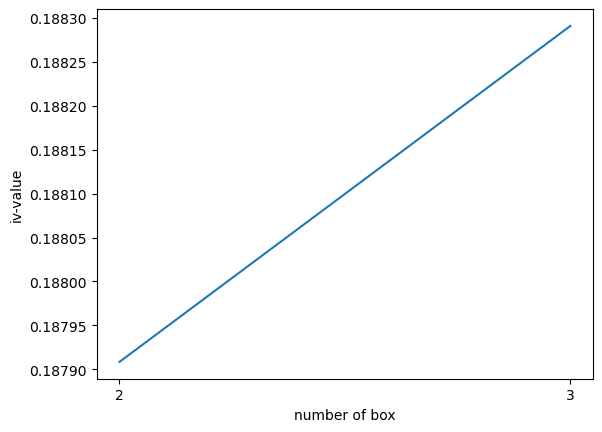

DebtRatio


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


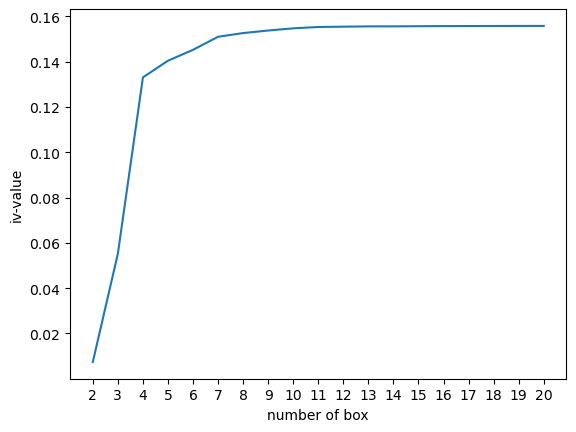

MonthlyIncome


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


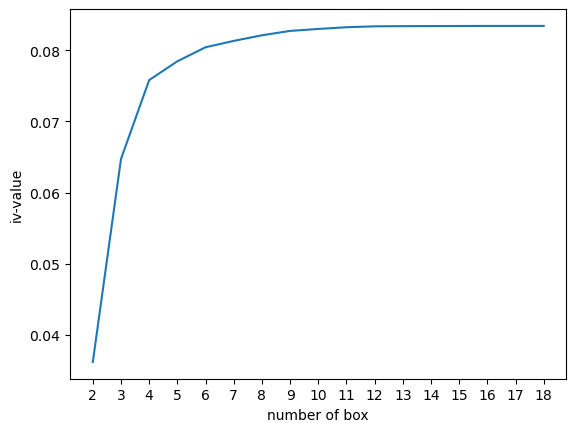

NumberOfOpenCreditLinesAndLoans


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


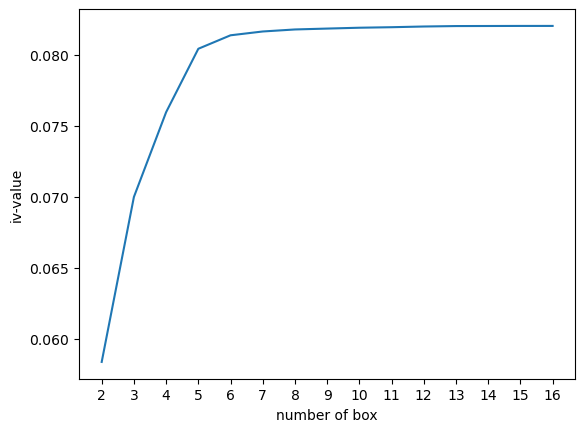

NumberOfTimes90DaysLate


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


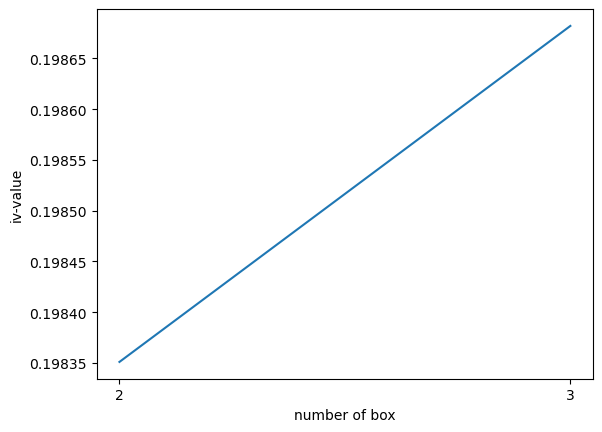

NumberRealEstateLoansOrLines


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


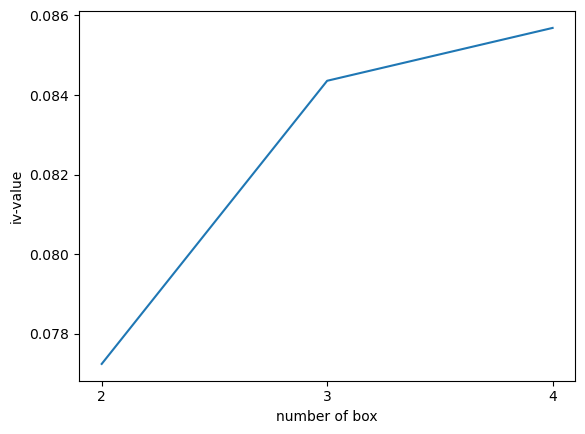

NumberOfTime60-89DaysPastDueNotWorse


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


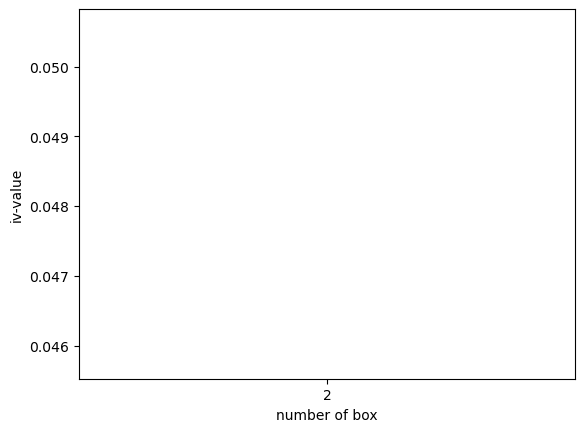

NumberOfDependents


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]
d:\anaconda\envs\mineenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\mineenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: div

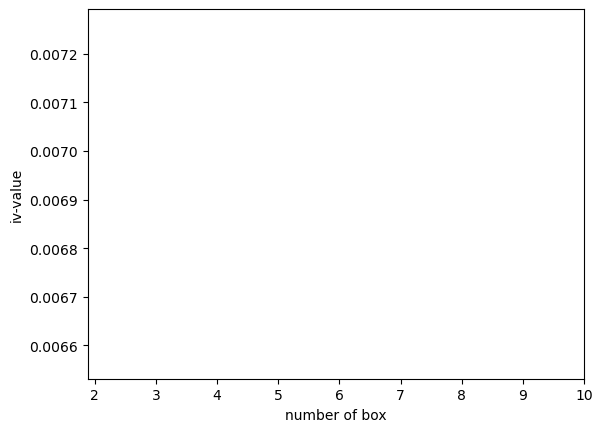

In [81]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data, i, 'SeriousDlqin2yrs', n = 2, q = 20)

# 发现有些图是一条直线，有些图是空白
# 因为有些特征（如家人数）本身就是分类变量，取不出来20个箱子
# 因此有些需要手动分箱

### 对所有特征进行分箱

In [82]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

In [83]:
auto_col_bins ={
    'RevolvingUtilizationOfUnsecuredLines':6,
    'age':5,
    'DebtRatio':4,
    'MonthlyIncome':3,
    'NumberOfOpenCreditLinesAndLoans':5
}

byhand_col = {
    'NumberOfTime30-59DaysPastDueNotWorse': [0, 1, 2, 13],
    'NumberOfTimes90DaysLate': [0, 1, 2, 17],
    'NumberRealEstateLoansOrLines': [0, 1, 2, 4, 54],
    'NumberOfTime60-89DaysPastDueNotWorse': [0, 1, 2, 8],
    'NumberOfDependents':[0, 1, 2, 3]
}

# 保证区间覆盖 使用np.inf替换最大值，用-np.inf替换最小值
byhand_col = { k:[-np.inf, *v[:-1], np.inf] for k, v in byhand_col.items()}

In [119]:
byhand_col

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [84]:
bins_of_col = {}

for col in auto_col_bins:
    bins_df = graphforbestbin(model_data
                              ,col
                              ,'SeriousDlqin2yrs'
                              ,n = auto_col_bins[col]
                              ,q = 20
                              ,graph=False)
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))
    bins_list[0], bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list

bins_of_col.update(byhand_col)

bins_of_col

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.06032329040000001,
  0.2205061900643385,
  0.5501322350632445,
  0.9838187561604591,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 52.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.01628418785, 0.5036835902, 1.4873003218000007, inf],
 'MonthlyIncome': [-inf, 764.0, 6833.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [85]:
bins_df = graphforbestbin(model_data
                          
                          ,'age'
                          ,'SeriousDlqin2yrs'
                          ,n = auto_col_bins[col]
                          , q = 20
                          , graph=False)
bins_df

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count0 = DF.loc[DF[Y] == 0].groupby(by = 'qcut').count()[Y]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\1607294302.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count1 = DF.loc[DF[Y] == 1].groupby(by = 'qcut').count()[Y]


,min,max,count0,count1,total,%,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24934,39731,0.203740,0.627570,0.151467,0.256214,-0.525644
1,36.0,52.0,34389,46261,80650,0.413573,0.573602,0.352018,0.475364,-0.300398
2,52.0,61.0,20424,17223,37647,0.193054,0.457487,0.209067,0.176978,0.166629
3,61.0,74.0,20344,7536,27880,0.142968,0.270301,0.208248,0.077438,0.989259
4,74.0,107.0,7737,1363,9100,0.046665,0.149780,0.079199,0.014006,1.732490


## 映射数据

计算各箱的WOE，并且把woe替换发到原始数据中。因为我们将woe覆盖后的数据来建模，我们希望获取的是“各个箱”的分类结果来建模

In [86]:
data = model_data.copy()

data = data[['age', 'SeriousDlqin2yrs']].copy()

data['cut'] = pd.cut(data['age'], [-np.inf, 36.0, 52.0, 61.0, 74.0, np.inf])

data

,age,SeriousDlqin2yrs,cut
0,53,0,"(52.0, 61.0]"
1,63,0,"(61.0, 74.0]"
2,53,1,"(52.0, 61.0]"
3,73,0,"(61.0, 74.0]"
4,43,1,"(36.0, 52.0]"
...,...,...,...
195003,47,1,"(36.0, 52.0]"
195004,50,1,"(36.0, 52.0]"
195005,43,1,"(36.0, 52.0]"
195006,64,0,"(61.0, 74.0]"


In [87]:
# 将数据按分箱结果聚合，并取出其中的标签值
data.groupby('cut')['SeriousDlqin2yrs'].value_counts()

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\2642203930.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('cut')['SeriousDlqin2yrs'].value_counts()


cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24934
              0                   14797
(36.0, 52.0]  1                   46261
              0                   34389
(52.0, 61.0]  0                   20424
              1                   17223
(61.0, 74.0]  0                   20344
              1                    7536
(74.0, inf]   0                    7737
              1                    1363
Name: count, dtype: int64

In [88]:
# 使用unstack将树状结构变成表状结构
data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\839392576.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()


SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24934
"(36.0, 52.0]",34389,46261
"(52.0, 61.0]",20424,17223
"(61.0, 74.0]",20344,7536
"(74.0, inf]",7737,1363


In [89]:
bins_df = data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()
bins_df['woe'] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
bins_df
# 可以看到这个和我们之前包装那个函数计算结果一样 这里其实应该主要是算byhand分箱的那些特征分箱后的woe

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\4260054008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins_df = data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()


SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24934,-0.525644
"(36.0, 52.0]",34389,46261,-0.300398
"(52.0, 61.0]",20424,17223,0.166629
"(61.0, 74.0]",20344,7536,0.989259
"(74.0, inf]",7737,1363,1.732490


In [90]:
def new_getwoe(df, col, y, bins):
    df = df[[col, y]].copy()
    df['cut'] = pd.cut(df[col], bins)
    bins_df = df.groupby('cut')[y].value_counts().unstack()
    woe = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe


allwoe = {}
for col in bins_of_col:
    allwoe[col] = new_getwoe(model_data
                             , col
                             ,'SeriousDlqin2yrs'
                             ,bins_of_col[col])
allwoe

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\3136688273.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins_df = df.groupby('cut')[y].value_counts().unstack()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\3136688273.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins_df = df.groupby('cut')[y].value_counts().unstack()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3944\3136688273.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default a

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0603]     2.408976
 (0.0603, 0.221]    1.062535
 (0.221, 0.55]     -0.115076
 (0.55, 0.984]     -1.166426
 (0.984, 1.0]      -0.473225
 (1.0, inf]        -2.049399
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.525644
 (36.0, 52.0]   -0.300398
 (52.0, 61.0]    0.166629
 (61.0, 74.0]    0.989259
 (74.0, inf]     1.732490
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0163]     1.390297
 (0.0163, 0.504]   -0.003463
 (0.504, 1.487]    -0.471282
 (1.487, inf]       0.172612
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 764.0]      0.213697
 (764.0, 6833.0]   -0.227655
 (6833.0, inf]      0.331848
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.891971
 (1.0, 3.0]    -0.348493
 (3.0, 5.0]    -0.053318
 (5.0, 17.0]    0.134856
 (17.0, inf]    0.461677
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351342
 (0.0, 1.0]    -0.870894
 (1.0, 2.0]    -1.388748
 (2.0, inf]    -1.518504
 

In [91]:
# 把woe映射到原始数据中
model_woe = pd.DataFrame(index = model_data.index)


In [ ]:
# model_woe['age'] = pd.cut(model_data['age'], bins_of_col['age']).map(allwoe['age'])
# 每一个样本的age所在的箱的woe值

,age
0,0.166049
1,0.988993
2,0.166049
3,0.988993
4,-0.300182
...,...
195003,-0.300182
195004,-0.300182
195005,-0.300182
195006,0.988993


In [92]:
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col], bins_of_col[col]).map(allwoe[col])

model_woe['SeriousDlqin2yrs'] = model_data['SeriousDlqin2yrs']

model_woe.head()

# 终于得到我们用于建模的特征矩阵

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.408976,0.166629,-0.003463,-0.227655,-0.053318,0.351342,0.239436,-0.398096,0.1255,0.649866,0
1,1.062535,0.989259,-0.003463,-0.227655,-0.053318,0.351342,0.239436,-0.398096,0.1255,0.649866,0
2,-0.115076,0.166629,-0.003463,-0.227655,0.134856,0.351342,0.239436,-0.398096,0.1255,-0.539451,1
3,1.062535,0.989259,-0.471282,-0.227655,0.134856,0.351342,0.239436,0.629368,0.1255,0.649866,0
4,-1.166426,-0.300398,-0.471282,-0.227655,-0.348493,0.351342,0.239436,-0.398096,0.1255,-0.466096,1


## 建模与模型验证

In [93]:
# 处理测试集
vali_woe = pd.DataFrame(index = vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col], bins_of_col[col]).map(allwoe[col])

vali_woe['SeriousDlqin2yrs'] = vali_data['SeriousDlqin2yrs']
vali_woe

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.408976,0.166629,1.390297,-0.227655,-0.053318,0.351342,0.239436,-0.398096,0.125500,0.649866,0
1,-1.166426,0.166629,-0.471282,0.331848,0.134856,-0.870894,0.239436,0.199871,0.125500,0.649866,1
2,2.408976,0.989259,-0.003463,-0.227655,-0.053318,0.351342,0.239436,-0.398096,0.125500,0.649866,0
3,2.408976,-0.300398,-0.003463,-0.227655,0.134856,0.351342,0.239436,0.199871,0.125500,0.649866,0
4,-0.115076,1.732490,-0.003463,-0.227655,0.134856,0.351342,0.239436,-0.398096,0.125500,0.649866,1
...,...,...,...,...,...,...,...,...,...,...,...
83571,-1.166426,-0.300398,0.172612,0.213697,0.134856,-1.518504,0.239436,0.199871,-1.796811,-0.504912,1
83572,-0.115076,0.166629,-0.003463,-0.227655,0.134856,0.351342,0.239436,-0.398096,0.125500,0.649866,1
83573,-2.049399,-0.525644,-0.003463,-0.227655,0.134856,0.351342,0.239436,0.199871,0.125500,-0.504912,1
83574,2.408976,-0.300398,-0.003463,-0.227655,0.134856,-0.870894,0.239436,-0.398096,0.125500,-0.504912,1


In [94]:
from sklearn.linear_model import LogisticRegression as LR

x = model_woe.iloc[:, :-1]
y = model_woe.iloc[:, -1]
vali_x = vali_woe.iloc[:, :-1]
vali_y = vali_woe.iloc[:, -1]
lr = LR().fit(x, y)
lr.score(vali_x, vali_y)

0.7875227337991768

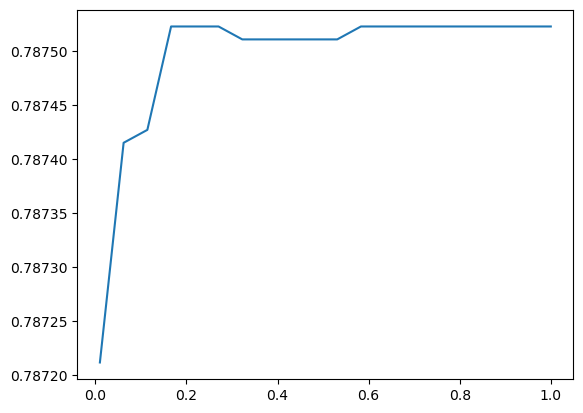

array([5], dtype=int32)

In [95]:
# 分数为0.7875 效果不好 尝试调整逻辑回归的参数以调整模型效果
c1 = np.linspace(0.01, 1, 20)
c2 = np.linspace(0.01, 0.2, 20)

score = []
for i in c1:
    lr = LR(solver='liblinear', C = i).fit(x, y)
    score.append(lr.score(vali_x, vali_y))

plt.figure()
plt.plot(c1, score)
plt.show()

lr.n_iter_

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


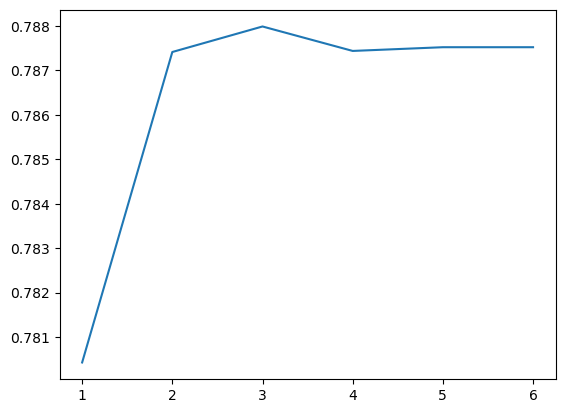

In [96]:
score = []
for i in [1, 2, 3, 4, 5, 6]:
    lr = LR(solver='liblinear', C=0.2, max_iter = i).fit(x, y)
    score.append(lr.score(vali_x, vali_y))

plt.figure()
plt.plot([1, 2, 3, 4, 5, 6], score)
plt.show()  

In [97]:
lr = LR(solver='liblinear', C=0.2, max_iter = 3).fit(x, y)
lr.score(vali_x, vali_y)

d:\anaconda\envs\mineenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7879893749401742

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

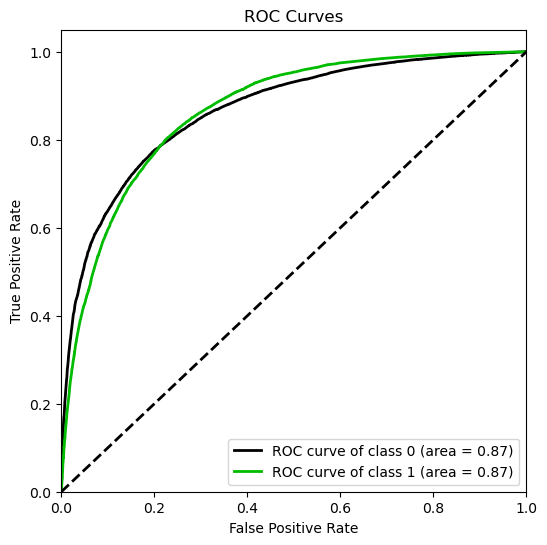

In [ ]:
# 发现模型效果就这样了
# 用别的评估指标

vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                       plot_micro=False
                       , figsize=(6,6), plot_macro=False)

# roc反应的是模型在捕捉少数类的时候，随着对少数类的捕捉水准越来越高，对多数类的判断越来越容易错
# 越左上越好


## 评分卡的输出和建立

将逻辑回归转换为标准评分卡中的分数：
用户信用评分卡  
评分卡转换公式：利用此公式将逻辑回归的概率转换为公式  
$$Score = A - B*ln(odds)$$  
$\bullet$ $odds = \frac{p}{1-p}$ 好坏比  
$\bullet$ $B=\frac{PDO}{ln(2)}$ 控制分数变化的斜率  
$\bullet$ $A=P0+B*ln(2*\theta_0)$ 基准调整项，$\theta_0$是初始好坏比  
推导过程  
1、设基准点：  
当$odds=2\theta_0$时，$Score=P0$
2、当odds翻倍时($odds=4\theta_0$)，分数减少PDO
$$P0-PDO= A - B*ln(4\theta_0)$$
3、解方程组得到AB

In [99]:
# 我们假设
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B,A

(28.85390081777927, 481.8621880878296)

In [100]:
lr.intercept_

array([-0.00096543])

In [102]:
base_score = A-B*lr.intercept_
base_score

array([481.89004447])

In [103]:
file = 'scoredata.csv'

with open(file,'w') as fdata:
    fdata.write('base_score,{}\n'.format(base_score))

for i, col in enumerate(x.columns):
    score = allwoe[col] * (-B*lr.coef_[0][i])
    score.name = 'score'
    score.index.name = col
    score.to_csv(file, header = True, mode = 'a')